In [2]:
import pandas as pd
import numpy as np
import nltk
import re
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [3]:
meta = pd.read_csv("Desktop/CloudTara/companies.csv", encoding = "ISO-8859-1")
meta = meta.dropna(how='any',axis=0) 
meta

,short_description,category_list
0,"We build cutting edge technology products, rapidly! We utilize modern, frontier technologies and top talent to rapidly build technology platforms and products that will revolutionize and drive the businesses of the 21st century.","Product,Software,Information Technology"
1,App-based resilience training designed for work,"Computer,Education,Health Care,Software,Wellness"
2,Buy Man Things is an online retailer specializing in gifts and products designed for Men.,"Consumer Electronics,Consumer Goods,E-Commerce,Fashion,Lifestyle"
3,Stabil Capital Management is a Financial Services company.,Crowdfunding
4,"CodementorÎ¾is an online marketplace connectingÎ¾developersÎ¾with experts for on-demand 1:1 help via screen sharing, video, and text chat.","Developer Tools,Education,Information Technology,Internet,Messaging,Video,Web Development"
5,"Smart MultiMedia, Inc. is located in Houston, Texas and specializes in high definition 3D digital scanning.","Consulting,Data Visualization,Digital Media,Information Technology,Manufacturing"
7,Wavewalker Investments is a financial services & impact investing company located in Charleston.,"Financial Services,Finance,Impact Investing"
8,"Discount School Supply is provides supplies childhood equipment, learning materials and educational toys.","Higher Education,Continuing Education,Education"
9,"Evolution 2 provides personal habits analytics and enables life improvement through the creation, evaluation, and tracking of habits.","Personal Development,Productivity Tools,Quantified Self"
10,"Ultraprise Loan Technologies, Inc. provides business-to-business e-commerce solutions for the financial services industry.","B2B,E-Commerce"


In [4]:
#creating list of categories
meta['category']=meta['category_list'].fillna("").apply(lambda x: x[:].split(','))

In [5]:
#finding unique categories
all_categories = sum(meta['category'],[])
len(set(all_categories))

661

In [6]:
all_categories = nltk.FreqDist(all_categories) 

# create dataframe
all_categories_df = pd.DataFrame({'Category': list(all_categories.keys()), 
                              'Count': list(all_categories.values())})

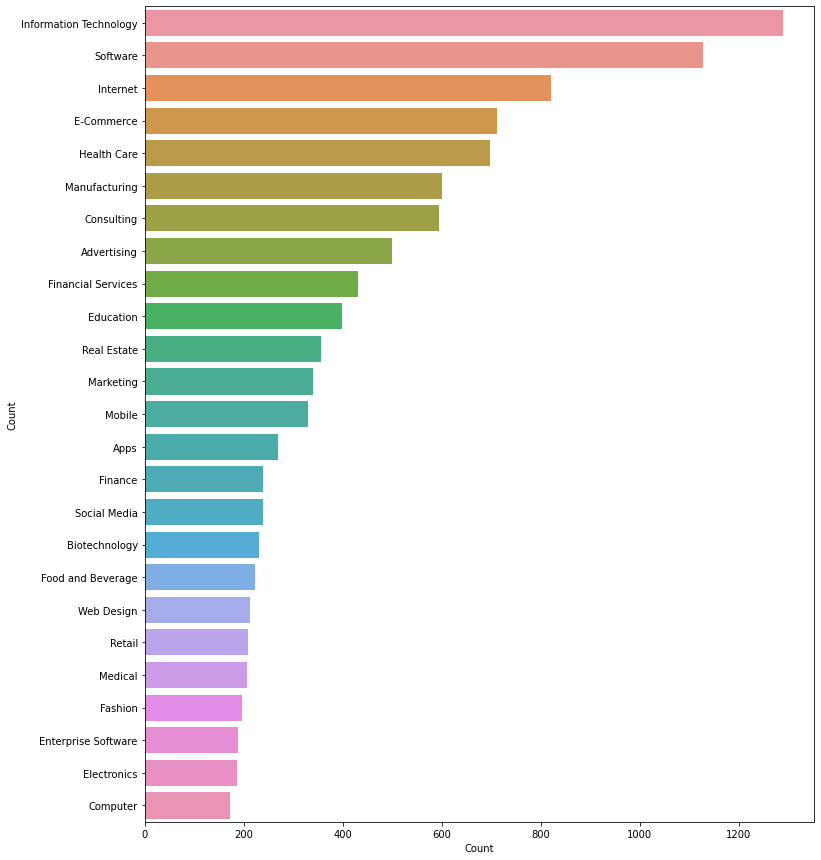

In [7]:
g = all_categories_df.nlargest(columns="Count", n = 25) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Category") 
ax.set(ylabel = 'Count') 
plt.show()

In [8]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [9]:
meta['clean_description'] = meta['short_description'].apply(lambda x: clean_text(x))
meta

,short_description,category_list,category,clean_description
0,"We build cutting edge technology products, rapidly! We utilize modern, frontier technologies and top talent to rapidly build technology platforms and products that will revolutionize and drive the businesses of the 21st century.","Product,Software,Information Technology","[Product, Software, Information Technology]",we build cutting edge technology products rapidly we utilize modern frontier technologies and top talent to rapidly build technology platforms and products that will revolutionize and drive the businesses of the st century
1,App-based resilience training designed for work,"Computer,Education,Health Care,Software,Wellness","[Computer, Education, Health Care, Software, Wellness]",app based resilience training designed for work
2,Buy Man Things is an online retailer specializing in gifts and products designed for Men.,"Consumer Electronics,Consumer Goods,E-Commerce,Fashion,Lifestyle","[Consumer Electronics, Consumer Goods, E-Commerce, Fashion, Lifestyle]",buy man things is an online retailer specializing in gifts and products designed for men
3,Stabil Capital Management is a Financial Services company.,Crowdfunding,[Crowdfunding],stabil capital management is a financial services company
4,"CodementorÎ¾is an online marketplace connectingÎ¾developersÎ¾with experts for on-demand 1:1 help via screen sharing, video, and text chat.","Developer Tools,Education,Information Technology,Internet,Messaging,Video,Web Development","[Developer Tools, Education, Information Technology, Internet, Messaging, Video, Web Development]",codementor is an online marketplace connecting developers with experts for on demand help via screen sharing video and text chat
5,"Smart MultiMedia, Inc. is located in Houston, Texas and specializes in high definition 3D digital scanning.","Consulting,Data Visualization,Digital Media,Information Technology,Manufacturing","[Consulting, Data Visualization, Digital Media, Information Technology, Manufacturing]",smart multimedia inc is located in houston texas and specializes in high definition d digital scanning
7,Wavewalker Investments is a financial services & impact investing company located in Charleston.,"Financial Services,Finance,Impact Investing","[Financial Services, Finance, Impact Investing]",wavewalker investments is a financial services impact investing company located in charleston
8,"Discount School Supply is provides supplies childhood equipment, learning materials and educational toys.","Higher Education,Continuing Education,Education","[Higher Education, Continuing Education, Education]",discount school supply is provides supplies childhood equipment learning materials and educational toys
9,"Evolution 2 provides personal habits analytics and enables life improvement through the creation, evaluation, and tracking of habits.","Personal Development,Productivity Tools,Quantified Self","[Personal Development, Productivity Tools, Quantified Self]",evolution provides personal habits analytics and enables life improvement through the creation evaluation and tracking of habits
10,"Ultraprise Loan Technologies, Inc. provides business-to-business e-commerce solutions for the financial services industry.","B2B,E-Commerce","[B2B, E-Commerce]",ultraprise loan technologies inc provides business to business e commerce solutions for the financial services industry


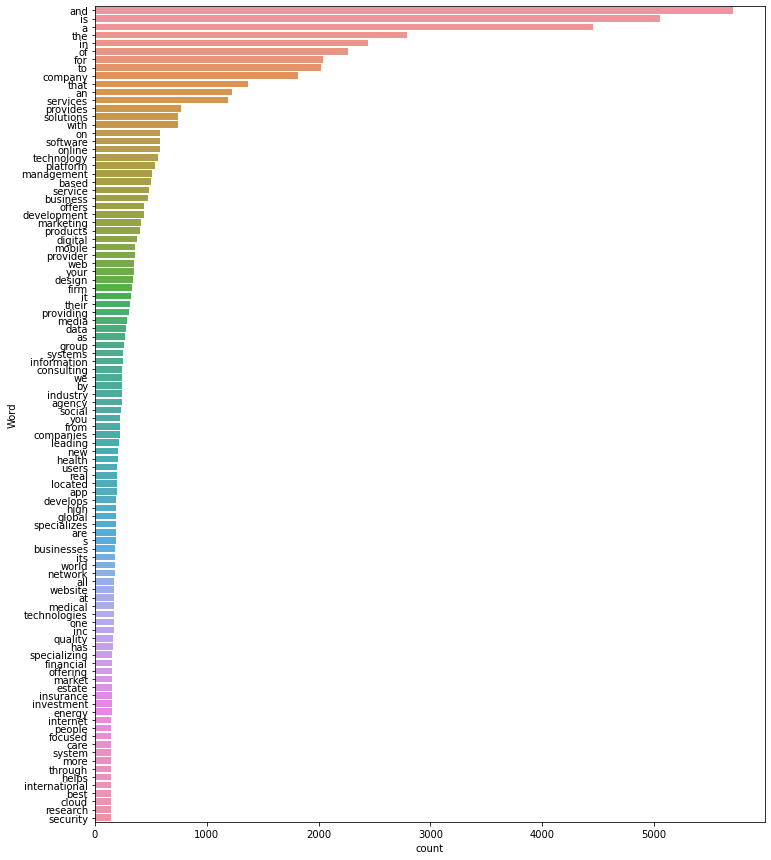

In [10]:
def freq_words(x, terms = 30): 
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
    # selecting top 20 most frequent words 
    d = words_df.nlargest(columns="count", n = terms) 
  
    # visualize words and frequencies
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 
    plt.show()
  
# print 100 most frequent words 
freq_words(meta['clean_description'], 100)

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rakeshyadav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
#removing stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)
meta['clean_description'] = meta['clean_description'].apply(lambda x: remove_stopwords(x))

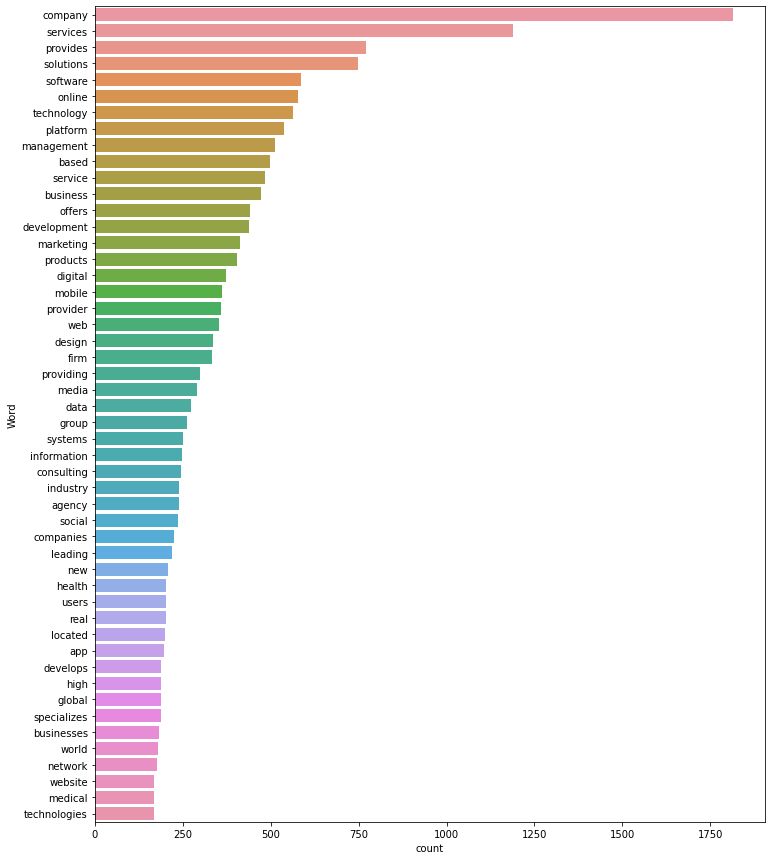

In [13]:
freq_words(meta['clean_description'], 50)

In [14]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(meta['category'])

# transform target variable
y = multilabel_binarizer.transform(meta['category'])

In [15]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=10000)

In [16]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(meta['clean_description'], y, test_size=0.06, random_state=9)

In [17]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [18]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [19]:
from sklearn.pipeline import Pipeline
lr = LogisticRegression()
model= Pipeline([('clf', OneVsRestClassifier(lr))])

In [20]:
# fit model on train data
model.fit(xtrain_tfidf, ytrain)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:75: UserWarning: Label not 410 is present in all training examples.
  str(classes[c]))


Pipeline(memory=None,
         steps=[('clf',
                 OneVsRestClassifier(estimator=LogisticRegression(C=1.0,
                                                                  class_weight=None,
                                                                  dual=False,
                                                                  fit_intercept=True,
                                                                  intercept_scaling=1,
                                                                  l1_ratio=None,
                                                                  max_iter=100,
                                                                  multi_class='auto',
                                                                  n_jobs=None,
                                                                  penalty='l2',
                                                                  random_state=None,
                                                      

In [22]:
from sklearn.externals import joblib
joblib.dump(model, 'category.model')

['category.model']

In [36]:
fittedModel = joblib.load('Category.model')
d = input("Enter Description: ")
d = clean_text(d)
d = [d]
x = tfidf_vectorizer.transform(d)
z = fittedModel.predict(x)
z_pred_prob=model.predict_proba(x)
z_pred_new=(z_pred_prob>=0.1).astype(int)
multilabel_binarizer.inverse_transform(z_pred_new)

Enter Description: Morgan Stanley, incorporated on October 1, 1981, is a financial holding company. The Company is engaged in global financial services. The Company, through its subsidiaries and affiliates, advises, and originates, trades, manages and distributes capital for governments, institutions and individuals.


[('Finance', 'Financial Services')]

In [ ]:
# evaluate performance
#f1_score(yval, y_pred_new, average="micro")